In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.shape

(891, 12)

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_df.shape

(418, 11)

In [9]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

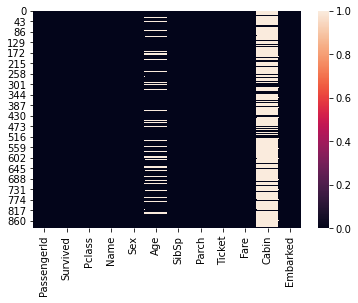

In [10]:
sns.heatmap(train_df.isnull())

<AxesSubplot:xlabel='Survived', ylabel='count'>

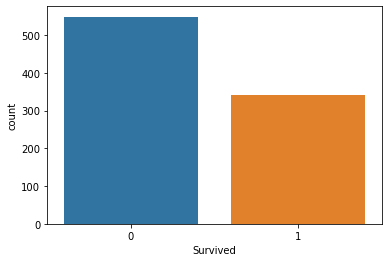

In [11]:
sns.countplot(x=train_df['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

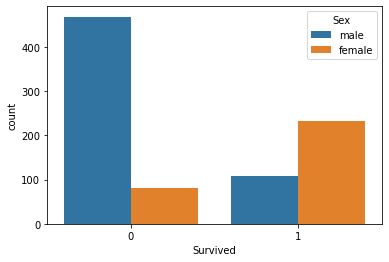

In [12]:
sns.countplot(x='Survived',hue='Sex',data=train_df)

We see that more number of male has died which is apppx.480 and less number of females were died compared to men

<AxesSubplot:xlabel='Survived', ylabel='count'>

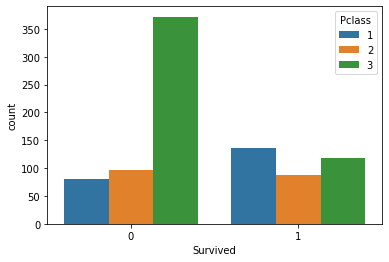

In [13]:
sns.countplot(x='Survived',hue='Pclass',data=train_df)

We observe that less number of 1st class passangers and 2 nd class Passengers whre as many number of 3rd class passangers have died 

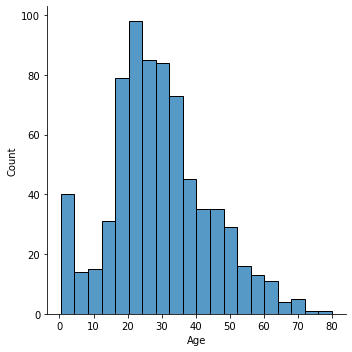

In [14]:
sns.displot(x=train_df['Age'].dropna())

<AxesSubplot:xlabel='SibSp', ylabel='count'>

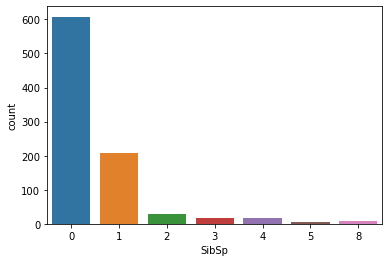

In [15]:
sns.countplot(x='SibSp',data=train_df)

We observe that many number of people doesnt have Siblings or Spouse on titanic

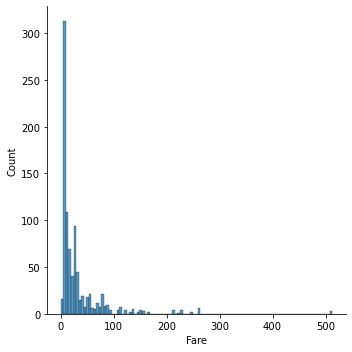

In [16]:
sns.displot(train_df['Fare'])

# Removing Null values

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

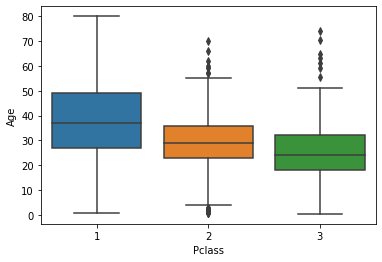

In [17]:
sns.boxplot(x='Pclass',y='Age',data=train_df)

In [18]:
def impute_nan(columns):
    Pclass=columns[0]
    Age=columns[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        elif Pclass==3:
            return 24
    else:
       return Age     
    

In [19]:
train_df['Age']=train_df[['Pclass','Age']].apply(impute_nan,axis=1)

In [20]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
train_df.drop('Cabin',axis=1,inplace=True)

In [22]:
mode=train_df['Embarked'].mode()[0]

In [23]:
train_df.fillna(mode,inplace=True)

In [24]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

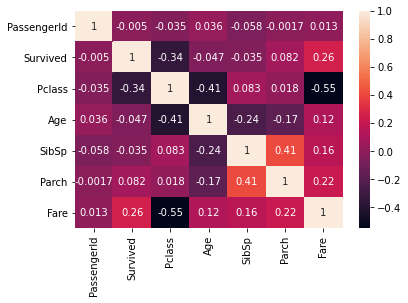

In [25]:
sns.heatmap(train_df.corr(),annot=True)

In [26]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
columns=['PassengerId','Name','Ticket']

In [28]:
train_df.drop(columns,axis=1,inplace=True)

In [29]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [30]:
train_df['Sex']=pd.get_dummies(train_df['Sex'],drop_first=True)

In [31]:
embark=pd.get_dummies(train_df['Embarked'],drop_first=True)

In [32]:
train_df=pd.concat([train_df,embark],axis=1)

In [33]:
train_df=train_df.drop('Embarked',axis=1)

In [34]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


Now lets us look at test data

In [35]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
test_df=test_df.drop(['PassengerId','Name','Ticket'],axis=1)

In [37]:
test_df.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [38]:
test_df['Age']=test_df[['Pclass','Age']].apply(impute_nan,axis=1)

In [39]:
test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=
                      True)

In [40]:
test_df=test_df.drop('Cabin',axis=1)

In [41]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [42]:
test_df['Sex']=pd.get_dummies(test_df['Sex'],drop_first=True)

In [43]:
embark=pd.get_dummies(test_df['Embarked'],drop_first=True)
test_df=pd.concat([test_df,embark],axis=1)
test_df=test_df.drop('Embarked',axis=1)

In [44]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,0,1
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,0,1
4,3,0,22.0,1,1,12.2875,0,1


In [45]:
X_train=train_df.drop('Survived',axis=1)
y_train=train_df['Survived']

In [46]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,0,1
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,0,1
4,3,0,22.0,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...
413,3,1,24.0,0,0,8.0500,0,1
414,1,0,39.0,0,0,108.9000,0,0
415,3,1,38.5,0,0,7.2500,0,1
416,3,1,24.0,0,0,8.0500,0,1


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\vhshe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
predictions=model.predict(X_test)

In [52]:
model.score(X_train,y_train)

0.8089887640449438

In [53]:
model.score(X_test,y_test)

0.8100558659217877

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
confusion_matrix(y_test,predictions)

array([[91, 14],
       [20, 54]], dtype=int64)

In [56]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
clf = GridSearchCV(model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [59]:
best_clf = clf.fit(X_test,y_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 740 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 4544 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   18.6s finished
C:\Users\vhshe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [60]:
best_clf.best_params_

{'C': 0.0001, 'max_iter': 100, 'penalty': 'none', 'solver': 'newton-cg'}

In [61]:
best_clf.best_score_

0.8492467043314501

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(y_test,predictions)

0.8100558659217877

In [64]:
train_df.shape

(891, 9)

In [65]:
sample=pd.read_csv('gender_submission.csv')

In [66]:
sample

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [67]:
data=pd.read_csv('sample_submission.csv')

In [68]:
data.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [96]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
dmodel=DecisionTreeClassifier()

In [98]:
dmodel.fit(X_test,y_test)

DecisionTreeClassifier()

In [99]:
dmodel.score(X_test,y_test)

1.0

In [100]:
dmodel.fit(X_train,y_train)

DecisionTreeClassifier()

In [101]:
parms={'criterion':['gini','entopy'],
    'splitter':["best", "random"],
    'max_depth':range(1,30,1),
    'min_samples_split':range(2,10,1),
    'min_samples_leaf':range(2,10,1)}

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
grid_search=GridSearchCV(dmodel,param_grid=parms,cv=5,n_jobs=-1)

In [104]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entopy'],
                         'max_depth': range(1, 30),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [105]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 5, 'min_samples_split': 6, 'splitter': 'random'}


In [106]:
grid_search.best_score_

0.8342755835713582

In [107]:
clf = DecisionTreeClassifier(criterion= 'gini', 
                             max_depth= 25,
                             min_samples_leaf= 5,
                             min_samples_split= 6, 
                             splitter= 'random')
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=25, min_samples_leaf=5, min_samples_split=6,
                       splitter='random')

In [108]:
predictions=clf.predict(test_df)

In [109]:
df1=pd.DataFrame(predictions,columns=['Survived'])

In [110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  418 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB


In [115]:
samp_data=pd.read_csv('sample_submission.csv')

In [116]:
data=samp_data.drop(['Survived'],axis=1)

In [117]:
data=pd.concat([data,df1],axis=1)

In [119]:
data.to_csv('sample_submission_dtree.csv',index=False)

In [121]:
import pickle
file_name='titianic_survival_dtree.pickle'
pickle.dump(clf,open(file_name,'wb'))